# Insurance Cost Prediction

In this project, we will perform analytics operations on an insurance database that uses the below mentioned parameters and make a prediction model for the same.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Loading dataset
df = pd.read_csv(r"C:\Users\mayan\Downloads\medical_insurance_dataset.csv", header=None)
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [3]:
# Adding column names
headers=['Age','Gender','BMI','No_of_children','Smoker','Region','Charges']
df.columns=headers

In [4]:
# Replacing '?' symbol from the dataset
df.replace('?',np.nan,inplace=True)

In [5]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2768 non-null   object 
 1   Gender          2772 non-null   int64  
 2   BMI             2772 non-null   float64
 3   No_of_children  2772 non-null   int64  
 4   Smoker          2765 non-null   object 
 5   Region          2772 non-null   int64  
 6   Charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [6]:
# Handling missing values
age_mean=df['Age'].astype('float').mean(axis=0)
df['Age'].replace(np.nan,age_mean,inplace=True)

is_smoker = df['Smoker'].value_counts().idxmax()
df['Smoker'].replace(np.nan,is_smoker,inplace=True)

df[['Age','Smoker']]=df[['Age','Smoker']].astype("int")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2772 non-null   int32  
 1   Gender          2772 non-null   int64  
 2   BMI             2772 non-null   float64
 3   No_of_children  2772 non-null   int64  
 4   Smoker          2772 non-null   int32  
 5   Region          2772 non-null   int64  
 6   Charges         2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB


In [7]:
# Round the values in 'Charges' column to two decimal places.
df[["Charges"]]=np.round(df[["Charges"]],2)
df.head()

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


(0.0, 66902.85800000001)

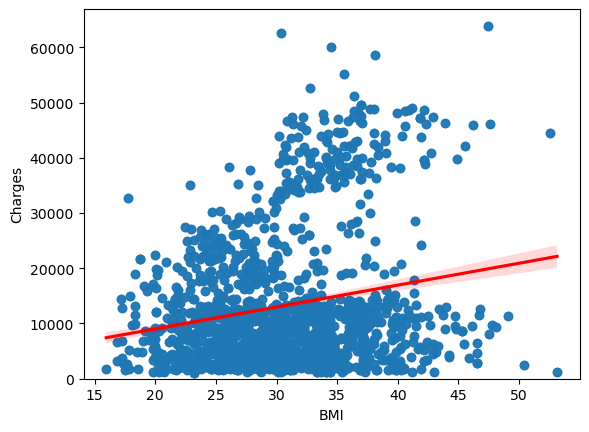

In [8]:
# Regression plot
sns.regplot(x='BMI',y='Charges',data=df,line_kws={'color':'red'})
plt.ylim(0,)

<Axes: xlabel='Smoker', ylabel='Charges'>

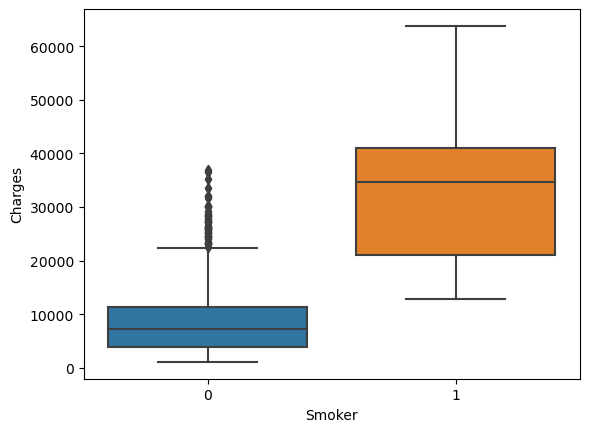

In [9]:
# Boxplot
sns.boxplot(x='Smoker',y='Charges',data=df)

In [10]:
df.corr()

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
Age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
Gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
BMI,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
No_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
Smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
Region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
Charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.

In [11]:
# Creating features and label
Z=df[["Age","Gender","BMI","No_of_children","Smoker","Region"]]
Y=df["Charges"]

In [12]:
# Splliting the dataset into train and test sets
x_train,x_test,y_train,y_test=train_test_split(Z,Y,test_size=.2,random_state=5)

In [13]:
# Making a simple Ridge Regression Model
Rig=Ridge(alpha=.1)
Rig.fit(x_train,y_train)
yhat=Rig.predict(x_test)
r2_score(y_test,yhat)

0.7648008866524313

In [14]:
# Using PolynomialFeatures to improve the performance of the model
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)
Rig.fit(x_train_pr,y_train)
yhat2=Rig.predict(x_test_pr)
r2_score(y_test,yhat2)

0.8567234404714745